In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls drive/MyDrive/data_multilabel/

Multi_Label_dataset/  Multi_Label_dataset.zip


In [3]:
cd drive/MyDrive/data_multilabel/

/content/drive/MyDrive/data_multilabel


In [6]:
ls

Multi_Label_dataset/  Multi_Label_dataset.zip


In [ ]:
ls Multi_Label_dataset/Images/

In [ ]:
!unzip Multi_Label_dataset.zip

In [4]:
import keras 
from keras.models import Sequential 
from tensorflow.keras import optimizers
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical 
from keras.preprocessing import image
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [5]:
train = pd.read_csv("Multi_Label_dataset/train.csv")

In [6]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [8]:
train_images = []
for i in tqdm(range(0,1000)):
  img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
  img = image.img_to_array(img)
  img = img/255
  train_images.append(img)
X = np.array(train_images)

100%|██████████| 1000/1000 [00:05<00:00, 171.55it/s]


In [9]:
X.shape

(1000, 400, 400, 3)

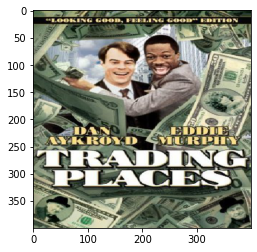

In [10]:
plt.imshow(X[2])

In [11]:
y = np.array(train.drop(['Id','Genre'],axis = 1))
y = y[0:1000,:]

In [12]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 100)

In [13]:
y_train.shape

(900, 25)

In [14]:
model = Sequential()
model.add(Conv2D(input_shape = (400,400,3), filters = 16,kernel_size = (5,5),strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32,kernel_size = (5,5),strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size = (5,5),strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 20,kernel_size = (3,3),strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 20,kernel_size = (3,3),strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 20,kernel_size = (3,3),strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(25,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 396, 396, 16)      1216      
                                                                 
 activation (Activation)     (None, 396, 396, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 198, 198, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 198, 198, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 32)      12832     
                                                                 
 activation_1 (Activation)   (None, 194, 194, 32)      0         
                                                        

In [16]:
adm= optimizers.Adam()
model.compile(loss = 'categorical_crossentropy',optimizer = adm, metrics = ['accuracy'])
#model.summary()

In [17]:
%%time 
history = model.fit(x_train,y_train,batch_size = 50,validation_split= 0.2,epochs = 1, verbose= 1)

15/15 [==============================] - 216s 14s/step - loss: 9.6630 - accuracy: 0.1597 - val_loss: 6.5950 - val_accuracy: 0.3389
CPU times: user 6min 19s, sys: 5.45 s, total: 6min 25s
Wall time: 4min 22s


In [22]:
img = image.load_img("/content/Avengers.jpeg",target_size = (400,400,3))
img = image.img_to_array(img)
img = img/255

Comedy (0.138)
Drama (0.108)
Sci-Fi (0.0685)
Romance (0.0608)
Mystery (0.0587)


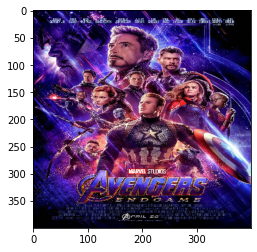

In [30]:
classes = np.array(train.columns[2:])
probability = model.predict(img.reshape(1,400,400,3))
top_5 = np.argsort(probability[0])[:-6:-1]
for i in range(5):
  print('{}'.format(classes[top_5[i]])+" ({:.3})".format(probability[0][top_5[i]]))
plt.imshow(img)

In [29]:
top_5

array([ 4,  7, 19, 18, 14])